In [13]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import os
from collections import defaultdict
import re

# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="deeplabcut_db",
    user="postgres",
    password="1234",
    host="localhost",
    port="5432"
)
cursor = conn.cursor()

# Step 2: Query coord_path where health = 'saline' and task = 'Food_Only'
cursor.execute("""
    SELECT coord_path, maze, name FROM dlc_files
    WHERE health = 'Saline' AND task = 'food_only'
""")

results = cursor.fetchall()

# Unpack results
coord_paths = [row[0] for row in results]
maze_values  = [row[1] for row in results]
name_values  = [row[2] for row in results]

print(f"No of files {len(coord_paths)}")

No of files 14


In [14]:
for path, maze, name in zip(coord_paths, maze_values, name_values):
    print(path, ':', maze, ':', name)

C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_left.csv : 3 : Toronto
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_right.csv : 4 : Berlin
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_left.csv : 1 : Austin
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_right.csv : 2 : Houston
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_bottom_left.csv : 3 : Waco
C:\DeepLabCutProjects\DLC-Atanu-2024-12-25\Analyzed-videos-filtered\Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____T

## Filter Out Files with 'None%d' in Name

In [16]:
filtered_paths = []
filtered_mazes = []
filtered_names = []

for path, maze, name in zip(coord_paths, maze_values, name_values):
    if "None" not in name:
        filtered_paths.append(path)
        filtered_mazes.append(maze)
        filtered_names.append(name)

print(f"No of files {len(filtered_paths)}")

No of files 14


## Plot corners to check model reproducibility

In [17]:
# Sample: maze_values and coord_paths must be aligned
# maze_values = ['3', '4', '1', ...]  # Already defined
# coord_paths = [...]                # Already defined

from collections import defaultdict

# Group coord_paths by maze number
maze_to_paths = defaultdict(list)
for path, maze in zip(filtered_paths, filtered_mazes):
    maze_to_paths[maze].append(path)

# Define corners
corners = ['Corner1', 'Corner2', 'Corner3', 'Corner4']

## Individual trail plot

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_left.csv (Maze 3)


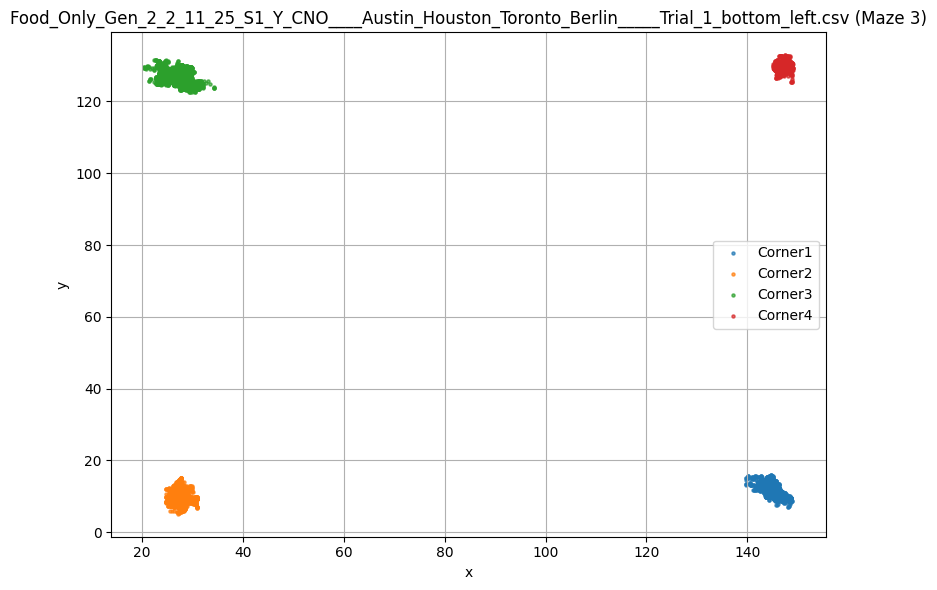

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_right.csv (Maze 4)


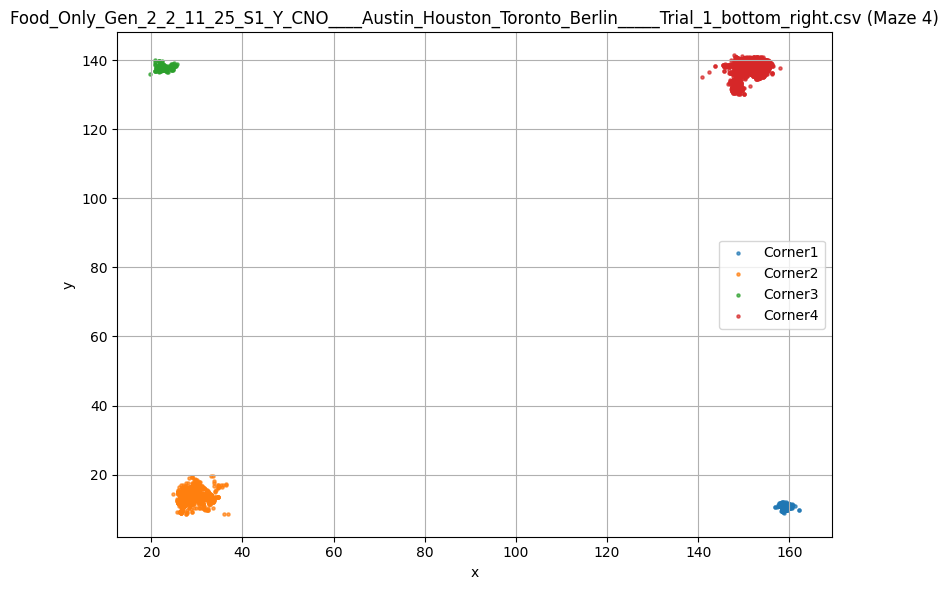

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_left.csv (Maze 1)


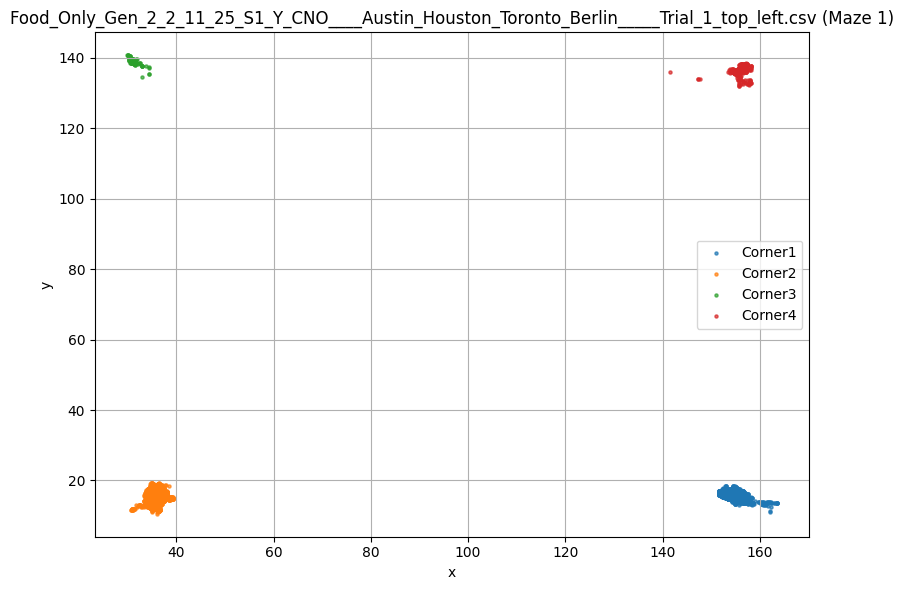

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_right.csv (Maze 2)


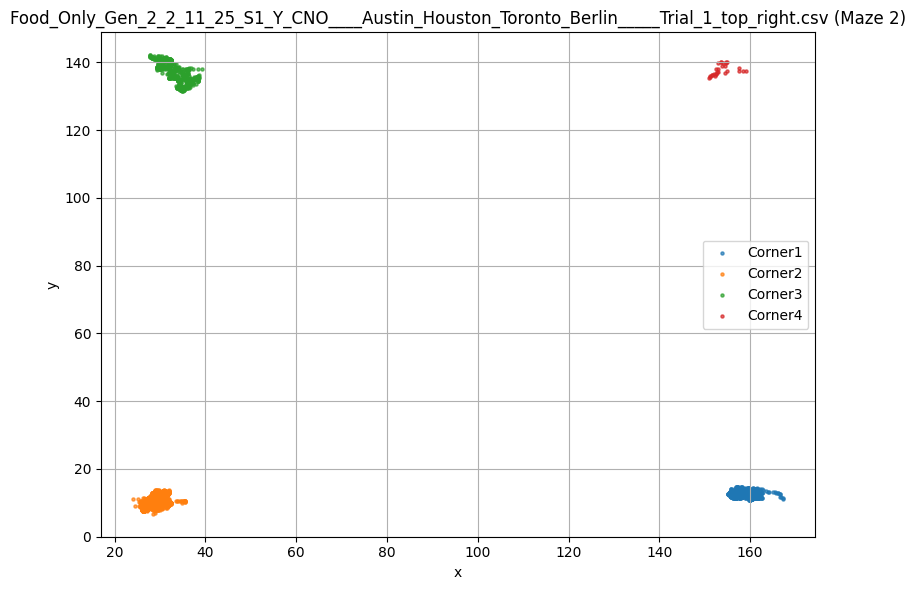

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_bottom_left.csv (Maze 3)


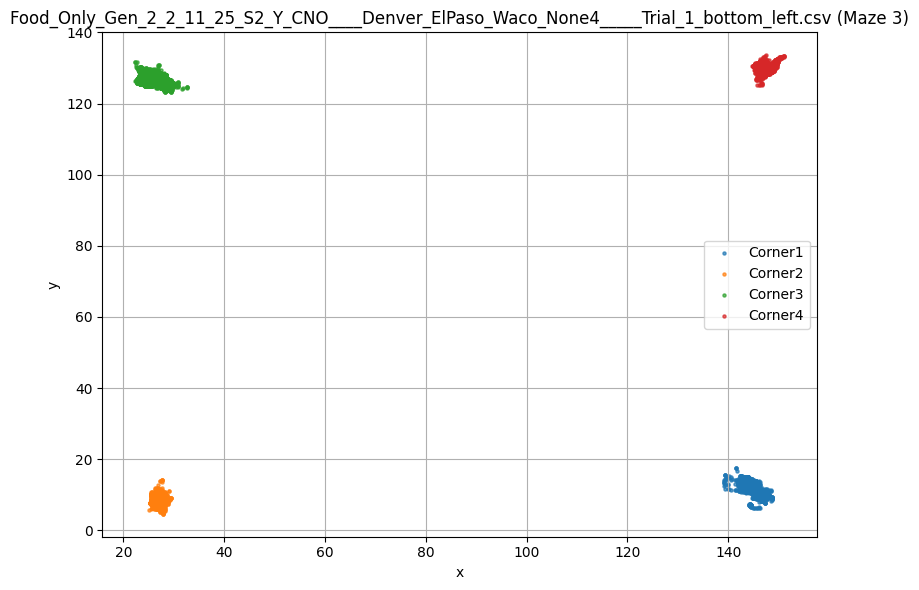

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_top_left.csv (Maze 1)


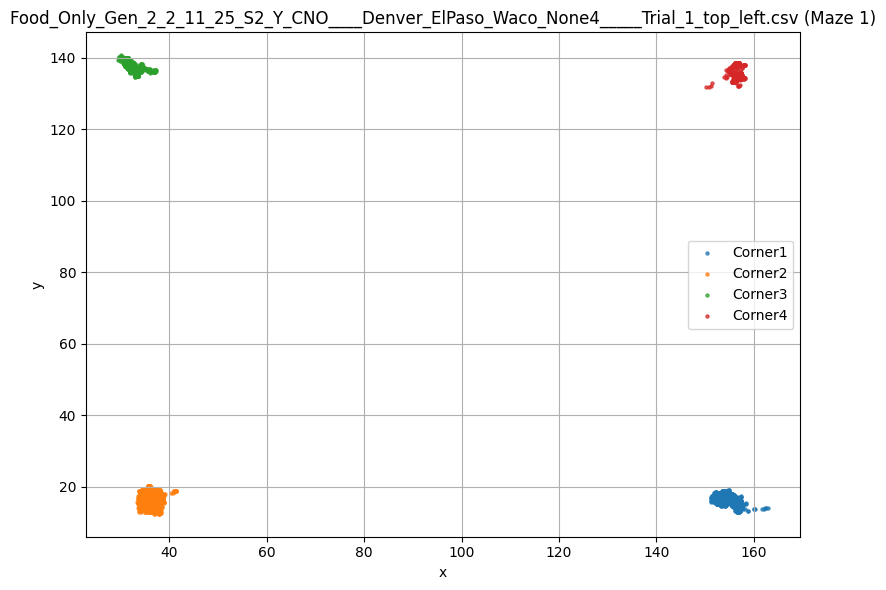

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_top_right.csv (Maze 2)


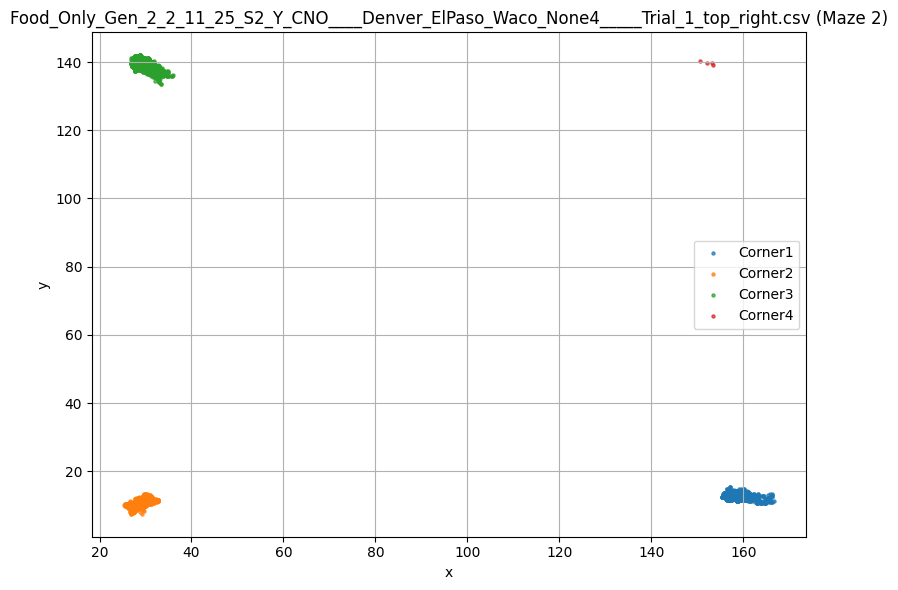

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_bottom_left.csv (Maze 3)


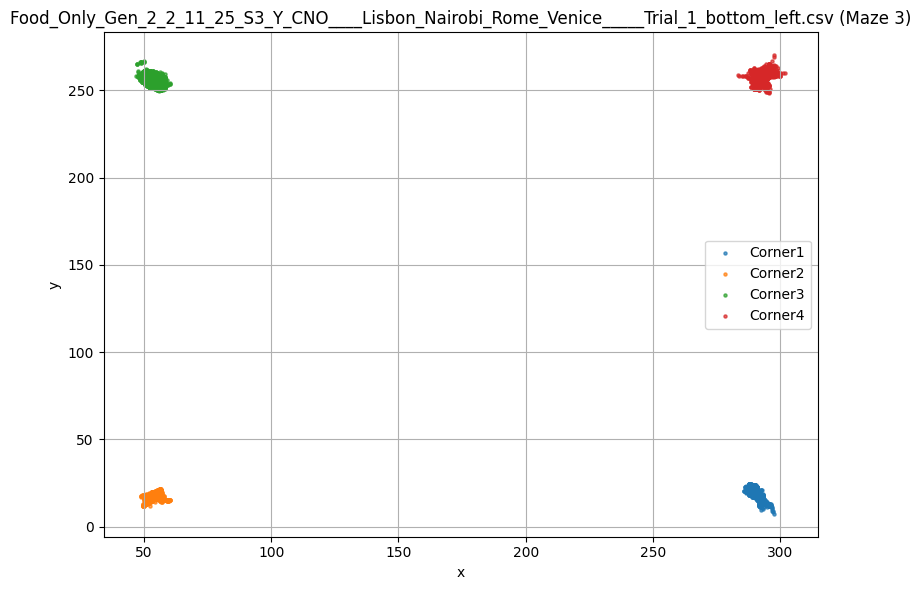

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_bottom_right.csv (Maze 4)


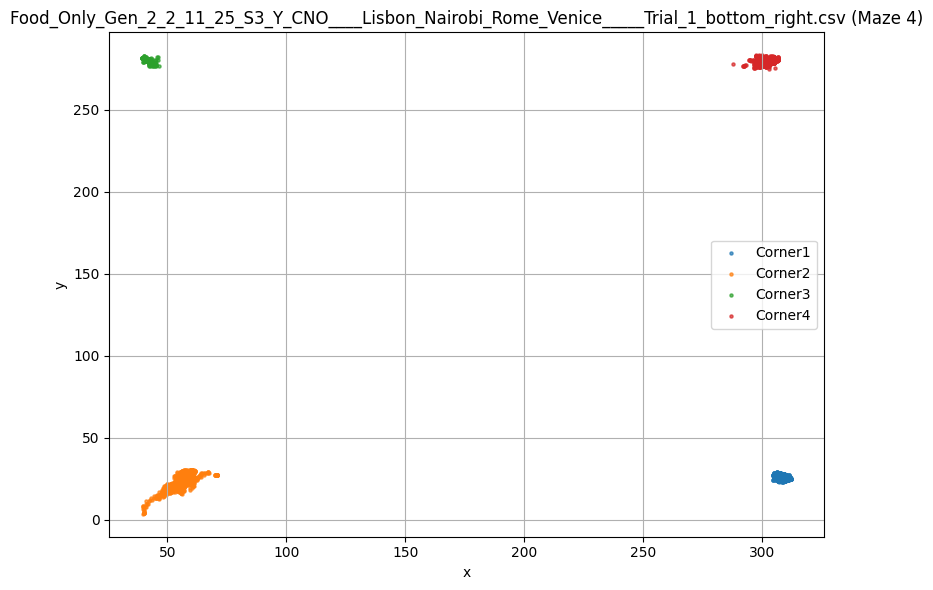

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_top_left.csv (Maze 1)


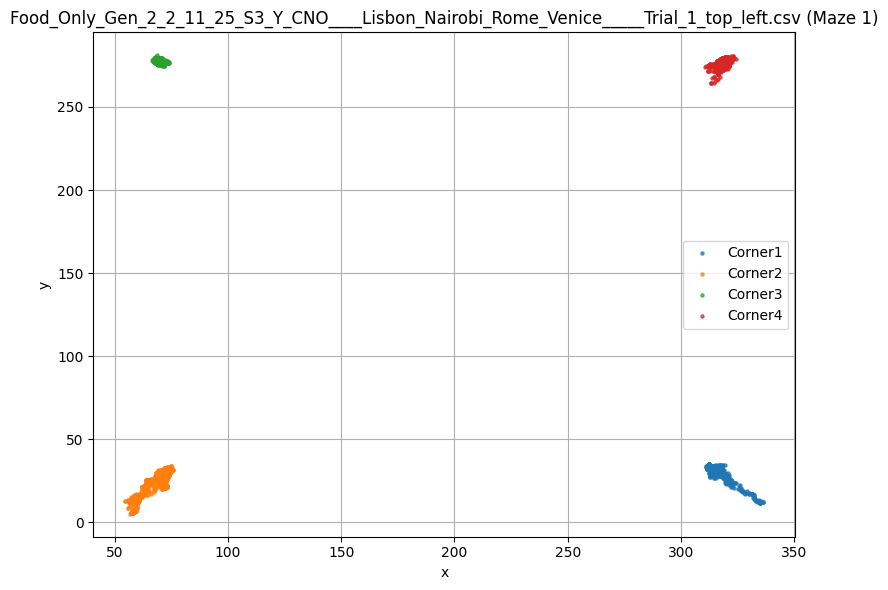

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_top_right.csv (Maze 2)


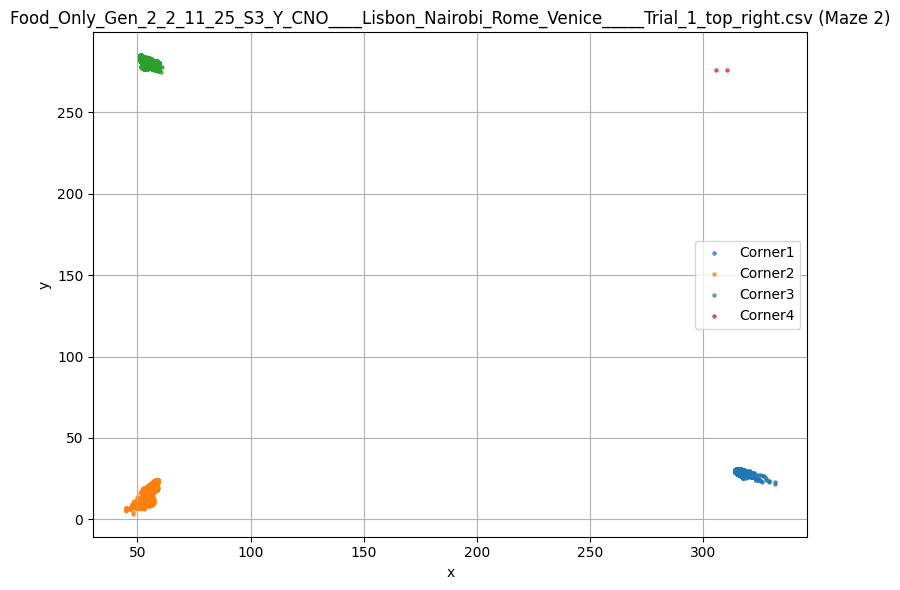

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_bottom_left.csv (Maze 3)


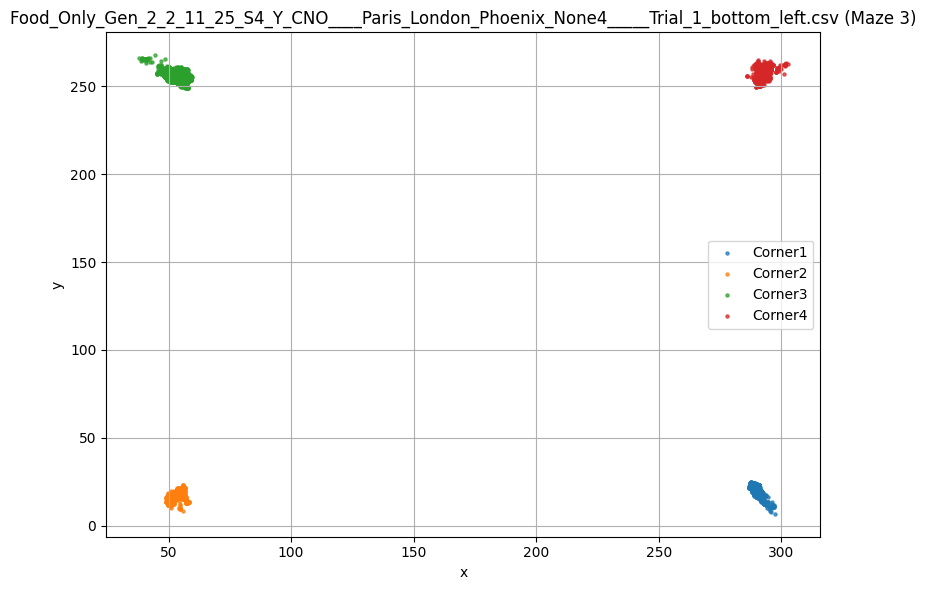

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_top_left.csv (Maze 1)


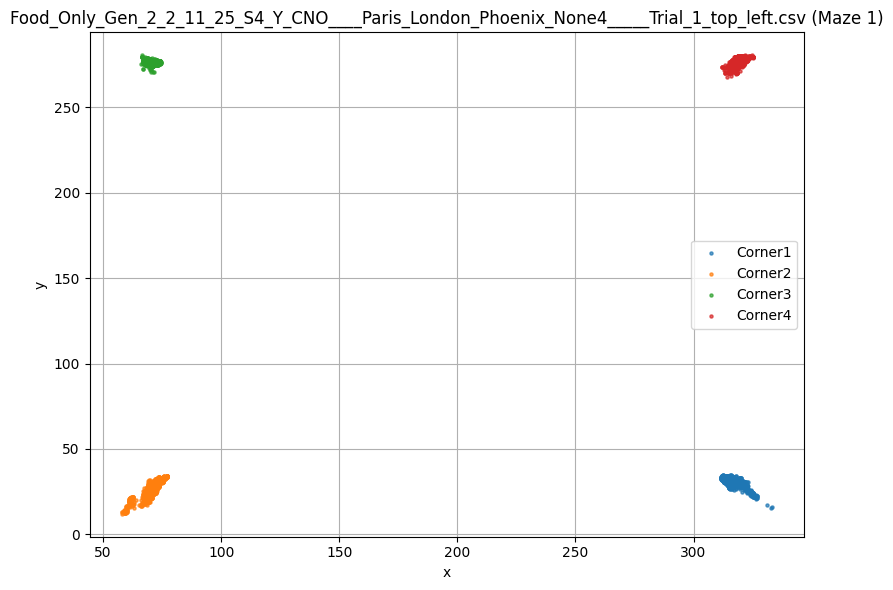

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_top_right.csv (Maze 2)


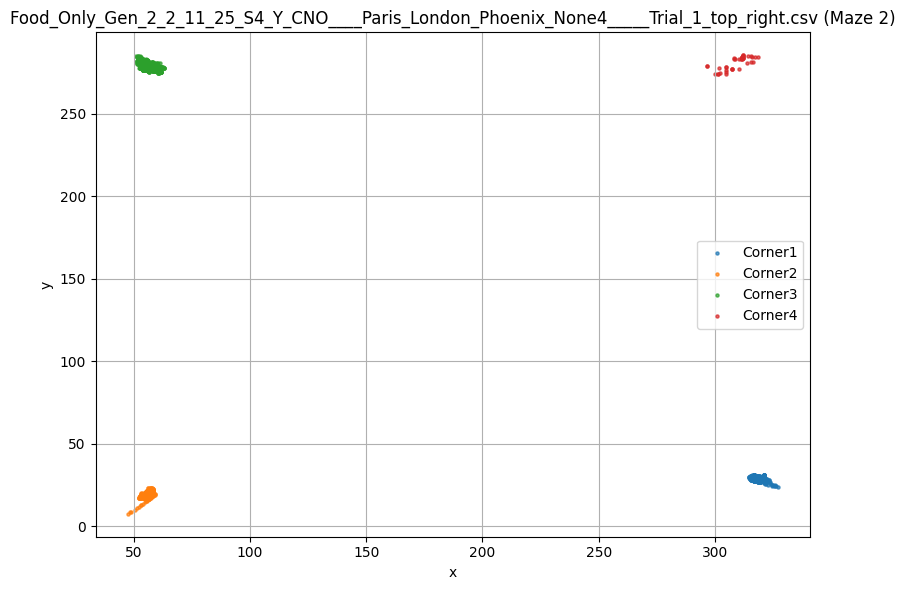

In [18]:
for path, maze in zip(filtered_paths, filtered_mazes):
    print(f"Plotting {os.path.basename(path)} (Maze {maze})")

    df = pd.read_csv(path, header=[1, 2])

    plt.figure(figsize=(8, 6))
    plt.title(f"{os.path.basename(path)} (Maze {maze})")

    for corner in corners:
        x = df[(corner, 'x')]
        y = df[(corner, 'y')]
        likelihood = df[(corner, 'likelihood')]

        # Apply likelihood filter
        mask = likelihood > 0.9
        x_filtered = x[mask]
        y_filtered = y[mask]

        plt.scatter(x_filtered, y_filtered, label=corner, s=5, alpha=0.7)

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Individial maze plot

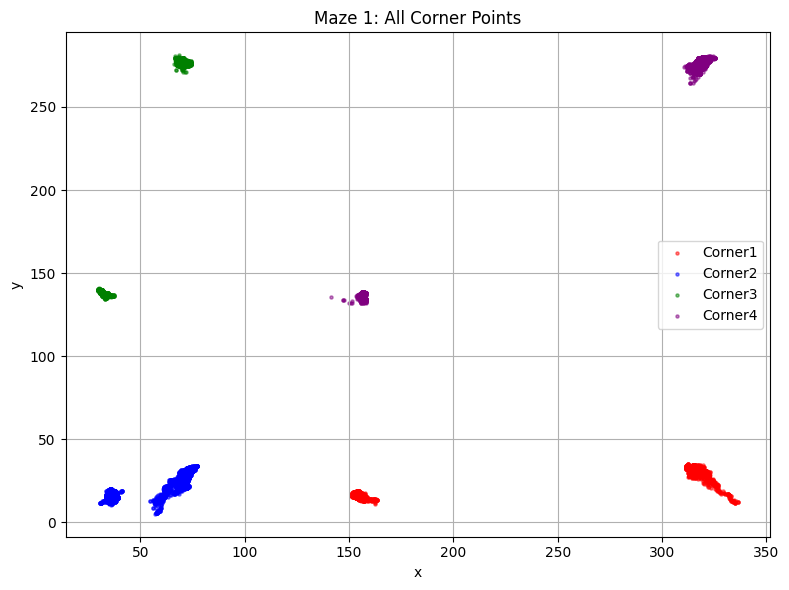

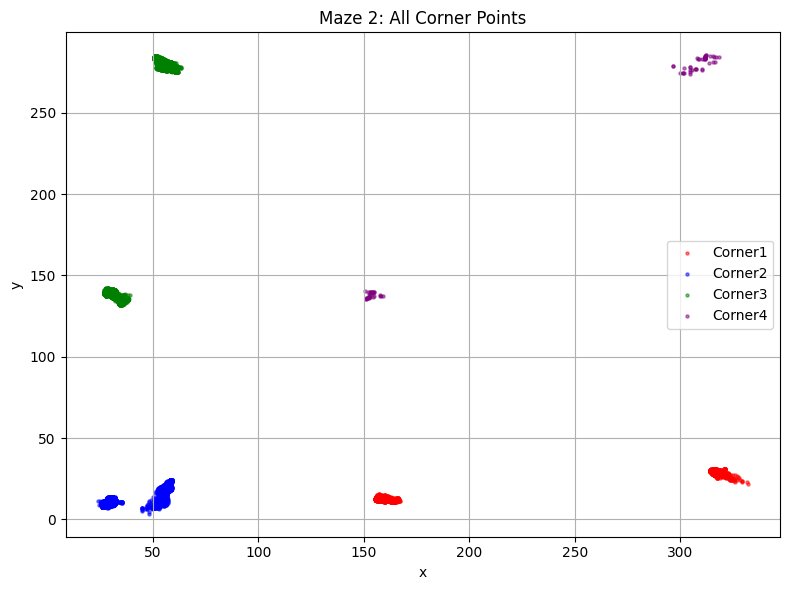

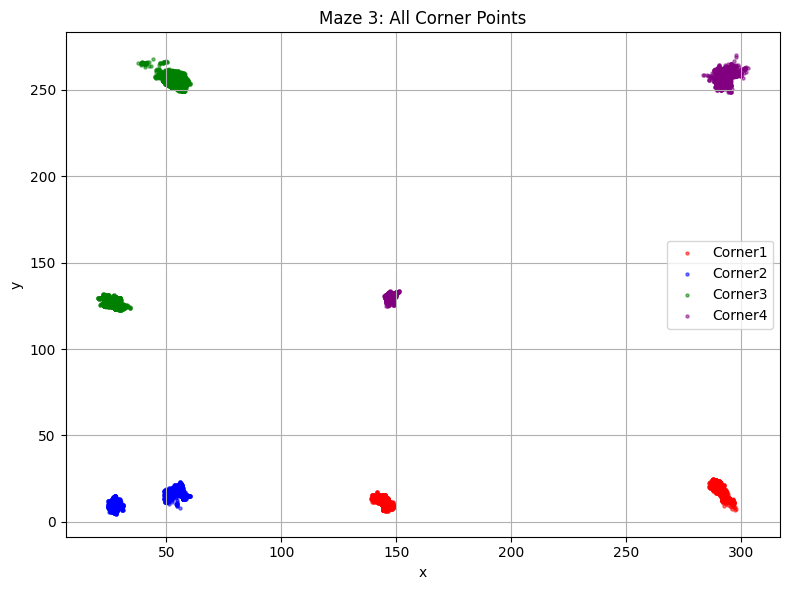

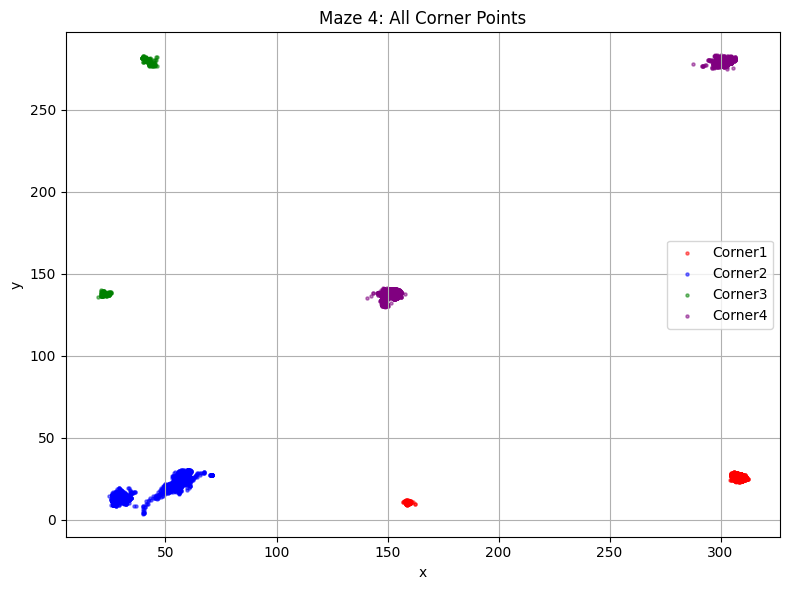

In [19]:
# Step 3: Define fixed colors per corner
corner_colors = {
    'Corner1': 'red',
    'Corner2': 'blue',
    'Corner3': 'green',
    'Corner4': 'purple'
}

# Step 4: Plot grouped maze plots
for maze, paths in sorted(maze_to_paths.items()):
    plt.figure(figsize=(8, 6))
    plt.title(f"Maze {maze}: All Corner Points")

    for path in paths:
        df = pd.read_csv(path, header=[1, 2])

        for corner in corner_colors.keys():
            x = df[(corner, 'x')]
            y = df[(corner, 'y')]
            likelihood = df[(corner, 'likelihood')]

            # Apply likelihood filter
            mask = likelihood > 0.9
            plt.scatter(x[mask], y[mask],
                        color=corner_colors[corner],
                        label=corner, s=5, alpha=0.5)

    plt.xlabel("x")
    plt.ylabel("y")
    # Avoid duplicate labels in legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [20]:
for col in df.columns:
    print(repr(col))

('Unnamed: 0_level_0', 'Unnamed: 0_level_1')
('Unnamed: 1_level_0', 's')
('Head', 'x')
('Head', 'y')
('Head', 'likelihood')
('Leftear', 'x')
('Leftear', 'y')
('Leftear', 'likelihood')
('Rightear', 'x')
('Rightear', 'y')
('Rightear', 'likelihood')
('Tailbase', 'x')
('Tailbase', 'y')
('Tailbase', 'likelihood')
('Neck', 'x')
('Neck', 'y')
('Neck', 'likelihood')
('Midback', 'x')
('Midback', 'y')
('Midback', 'likelihood')
('Lowerback', 'x')
('Lowerback', 'y')
('Lowerback', 'likelihood')
('Corner1', 'x')
('Corner1', 'y')
('Corner1', 'likelihood')
('Corner2', 'x')
('Corner2', 'y')
('Corner2', 'likelihood')
('Corner3', 'x')
('Corner3', 'y')
('Corner3', 'likelihood')
('Corner4', 'x')
('Corner4', 'y')
('Corner4', 'likelihood')


## Plot all coordinates of an individual file

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_left.csv (Maze 3, Name: Toronto)


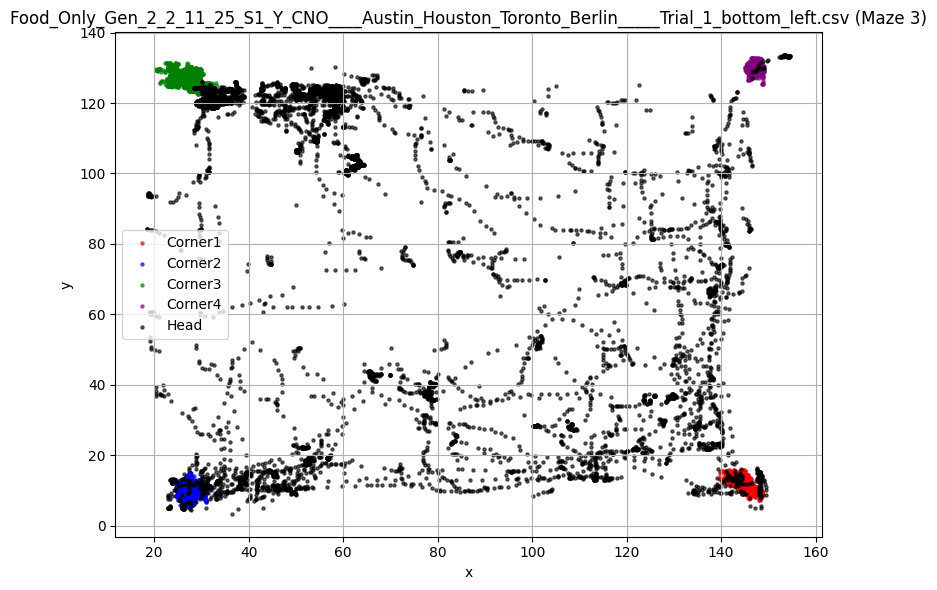

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_bottom_right.csv (Maze 4, Name: Berlin)


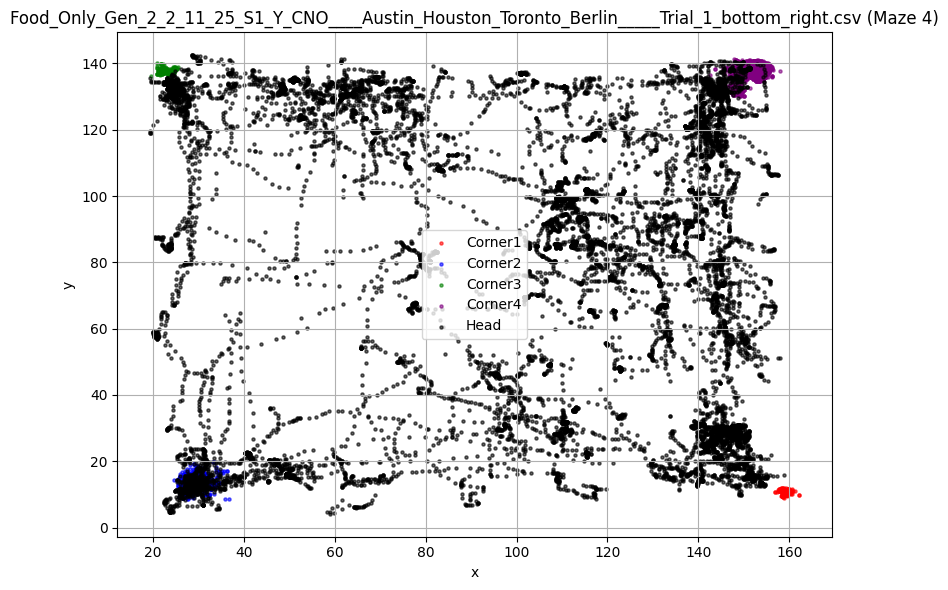

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_left.csv (Maze 1, Name: Austin)


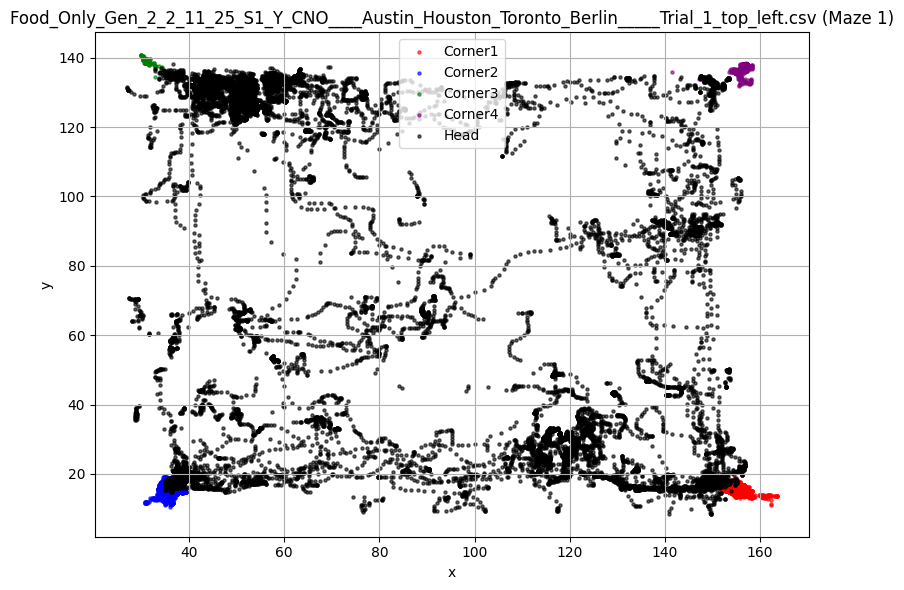

Plotting Food_Only_Gen_2_2_11_25_S1_Y_CNO____Austin_Houston_Toronto_Berlin_____Trial_1_top_right.csv (Maze 2, Name: Houston)


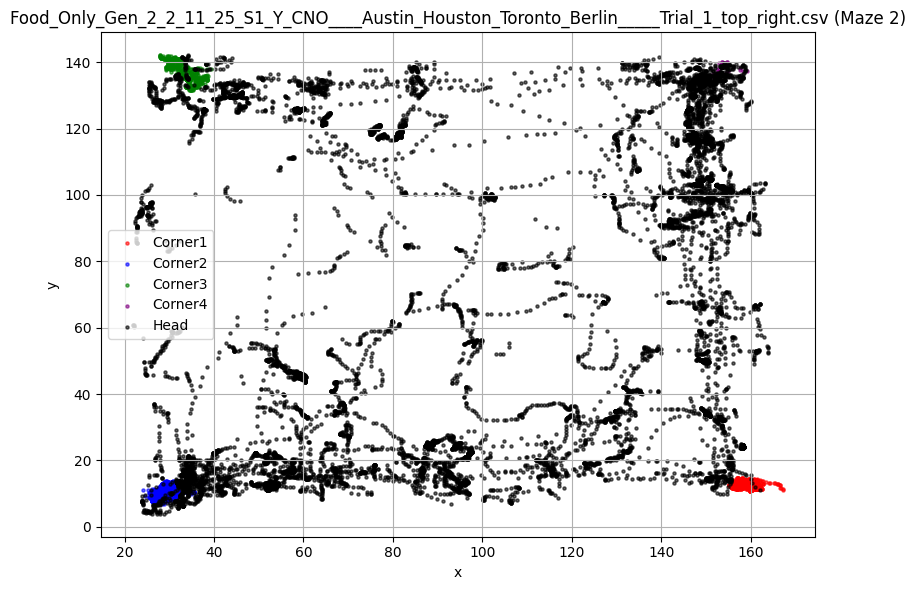

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_bottom_left.csv (Maze 3, Name: Waco)


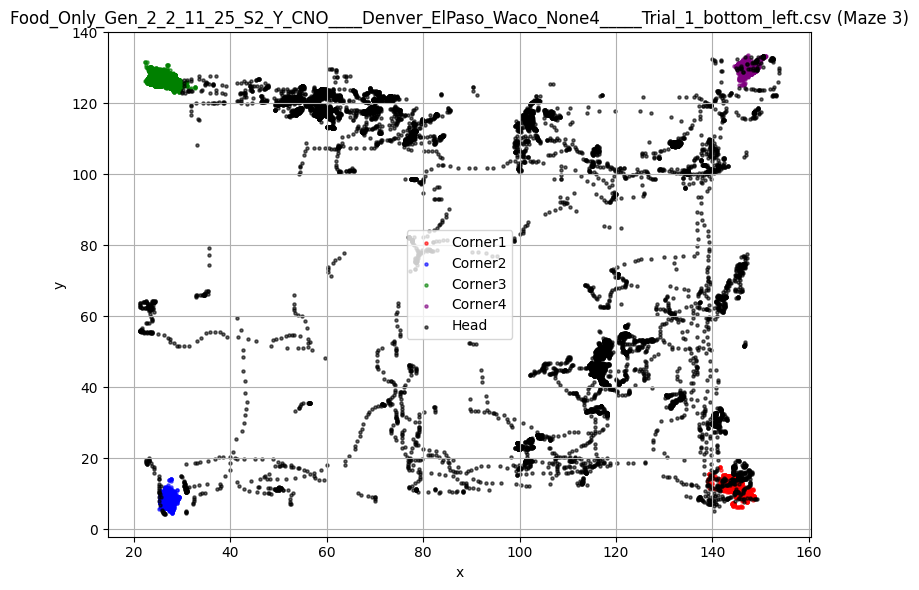

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_top_left.csv (Maze 1, Name: Denver)


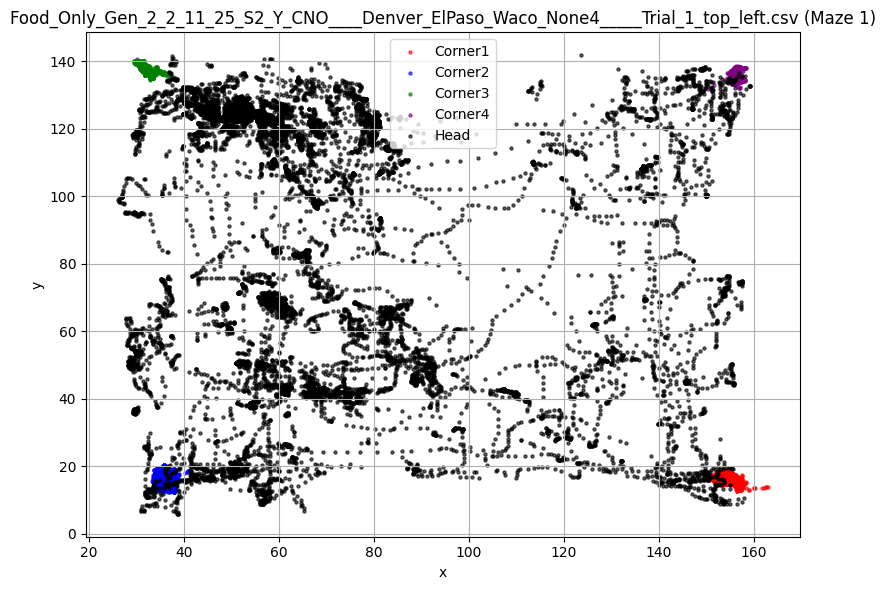

Plotting Food_Only_Gen_2_2_11_25_S2_Y_CNO____Denver_ElPaso_Waco_None4_____Trial_1_top_right.csv (Maze 2, Name: ElPaso)


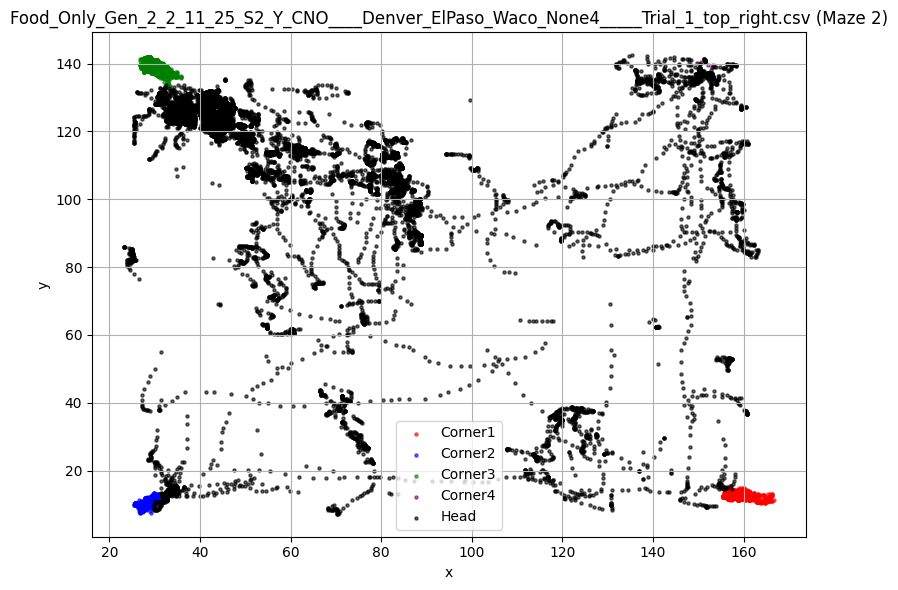

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_bottom_left.csv (Maze 3, Name: Rome)


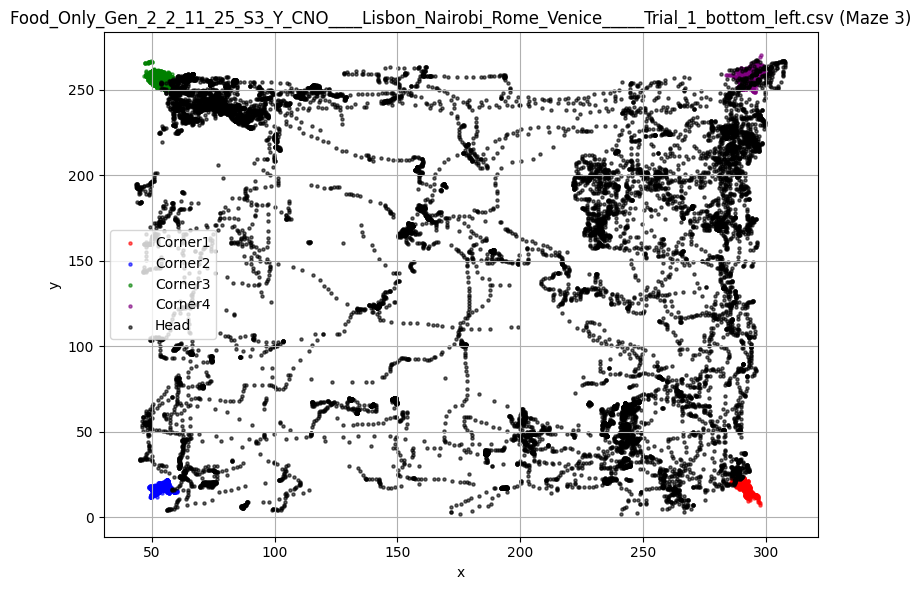

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_bottom_right.csv (Maze 4, Name: Venice)


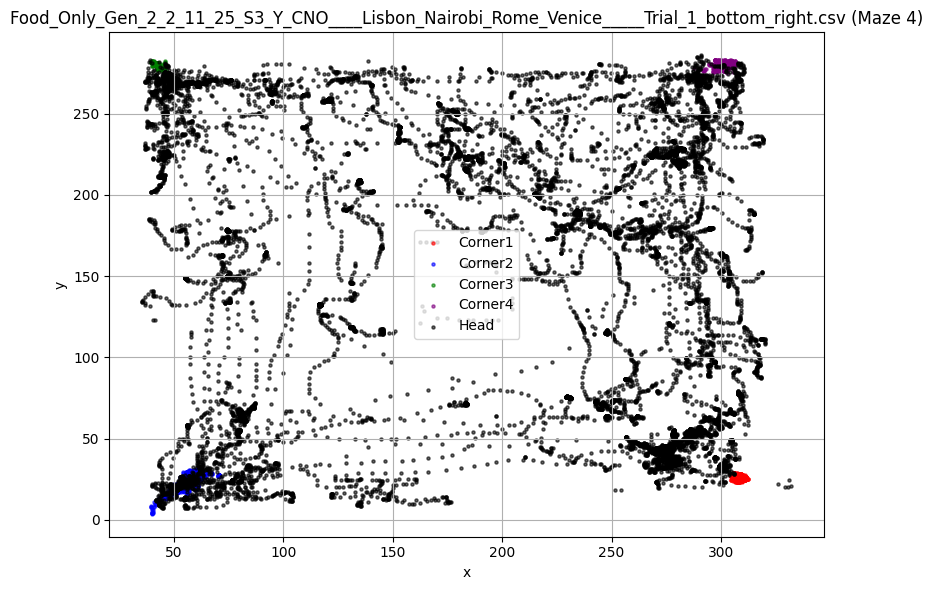

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_top_left.csv (Maze 1, Name: Lisbon)


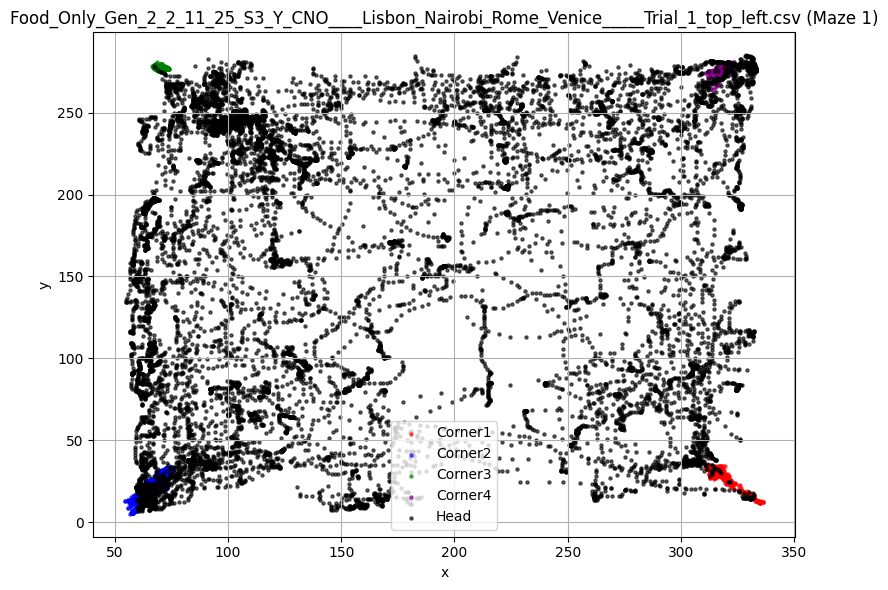

Plotting Food_Only_Gen_2_2_11_25_S3_Y_CNO____Lisbon_Nairobi_Rome_Venice_____Trial_1_top_right.csv (Maze 2, Name: Nairobi)


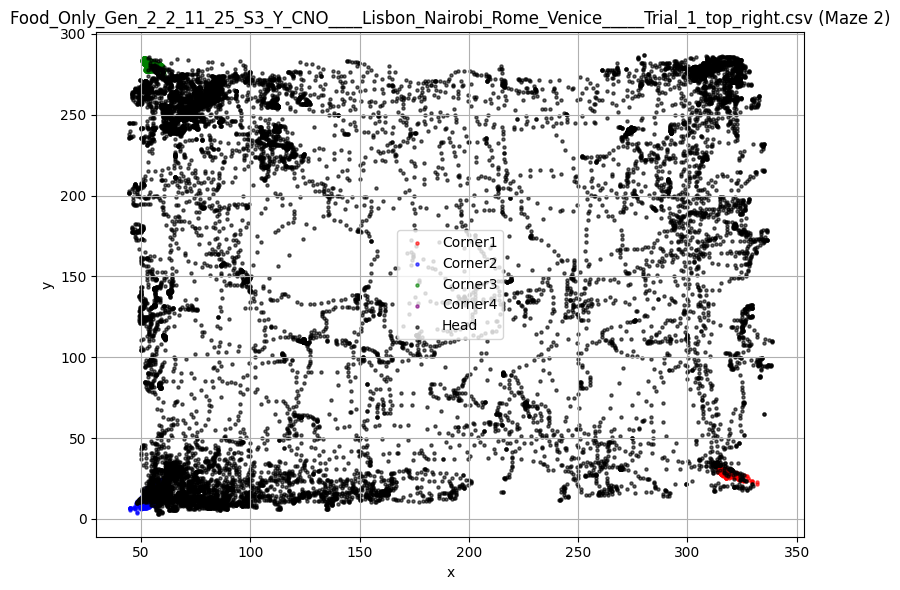

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_bottom_left.csv (Maze 3, Name: Phoenix)


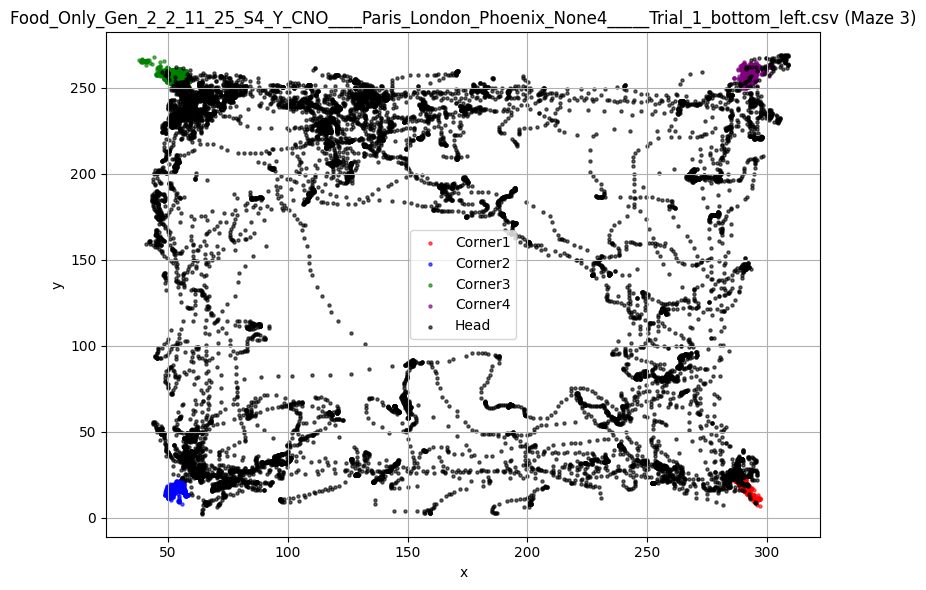

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_top_left.csv (Maze 1, Name: Paris)


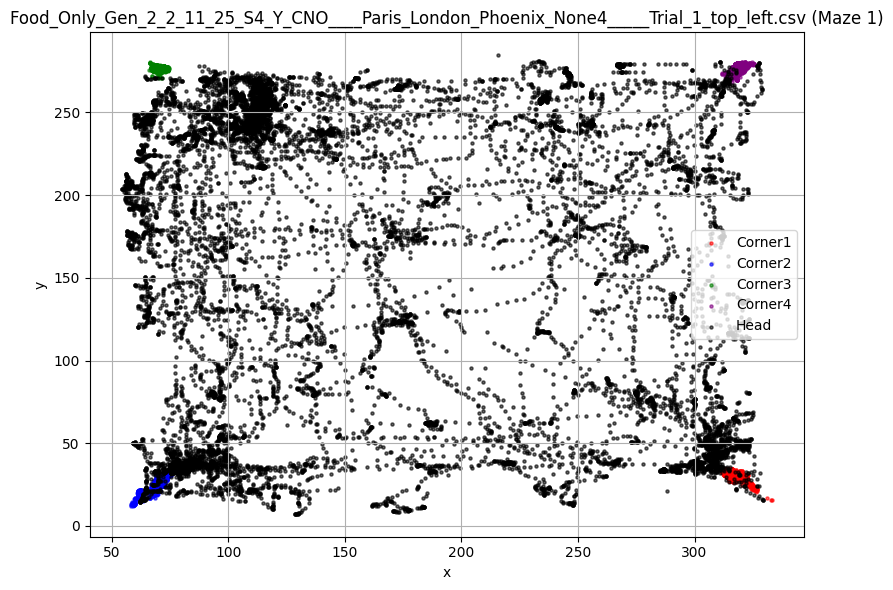

Plotting Food_Only_Gen_2_2_11_25_S4_Y_CNO____Paris_London_Phoenix_None4_____Trial_1_top_right.csv (Maze 2, Name: London)


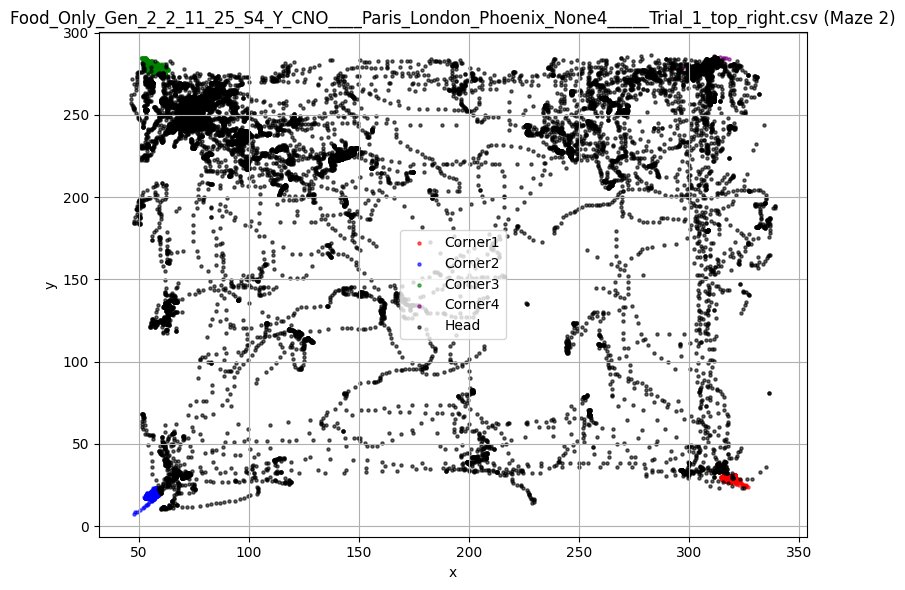

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

# Step 1: Filter out 'None%d' animals
filtered_paths = []
filtered_mazes = []
filtered_names = []

for path, maze, name in zip(coord_paths, maze_values, name_values):
    if not re.search(r'None\d+', name):
        filtered_paths.append(path)
        filtered_mazes.append(maze)
        filtered_names.append(name)

# Step 2: Fixed colors for corners and head
corner_colors = {
    'Corner1': 'red',
    'Corner2': 'blue',
    'Corner3': 'green',
    'Corner4': 'purple'
}
head_color = 'black'

# Step 3: Plot each individual file
for path, maze, name in zip(filtered_paths, filtered_mazes, filtered_names):
    print(f"Plotting {os.path.basename(path)} (Maze {maze}, Name: {name})")
    df = pd.read_csv(path, header=[1, 2])

    plt.figure(figsize=(8, 6))
    plt.title(f"{os.path.basename(path)} (Maze {maze})")

    # Plot corners
    for corner, color in corner_colors.items():
        x = df[(corner, 'x')]
        y = df[(corner, 'y')]
        l = df[(corner, 'likelihood')]
        mask = l > 0.9
        plt.scatter(x[mask], y[mask], color=color, s=5, alpha=0.6, label=corner)

    # Plot head
    xh = df[('Head', 'x')]
    yh = df[('Head', 'y')]
    lh = df[('Head', 'likelihood')]
    mask = lh > 0.9
    plt.scatter(xh[mask], yh[mask], color=head_color, s=5, alpha=0.6, label='Head')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.grid(True)

    # Prevent duplicate legend entries
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())

    plt.tight_layout()
    plt.show()
